## Initial data exploration sample code 

This notebook will introduce you some basic techniques of intial health data exploration.

## Import packages you need and data

In [1]:
## import all the packages you need 
import psycopg2
import pandas as pd
from getpass import getpass
from sqlalchemy import create_engine
import seaborn as sns
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
hostname = 'spinup-db001ec7.cluster-c9ukc6s0rmbg.us-east-1.rds.amazonaws.com'
username='introml568'
password='m7bxMRtyMqPbcxyRRGML8'
database_name = 'synthea-omop'

In [3]:
# Connect using SQL Alchemy to support pandas mapping
alchemy_engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{hostname}/{database_name}",  pool_recycle=3600)
db_connection = alchemy_engine.connect();

In [4]:
# Read in SQL tables through Pandas: Person and Visit 
omop_person = pd.read_sql("select * from omop.person", db_connection);
omop_visit = pd.read_sql("select * from omop.visit_occurrence", db_connection);

## Descriptive summary of data

In [5]:
# df.head() function will display the initial rows of the DataFrame
# you could also customize the number of rows that display，defalt is 5 
omop_person.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,1,8532,1927,10,3,1927-10-03,8527,38003564,None,None,None,00052f4c-d75a-ea2e-d0ab-748bff41dc51,F,0,white,0,nonhispanic,0
1,2,8507,1979,6,30,1979-06-30,8527,38003564,None,None,None,0005d850-1875-59d5-a092-6f045947d656,M,0,white,0,nonhispanic,0
2,3,8532,1930,5,21,1930-05-21,8527,38003564,None,None,None,0008b1d8-c1b9-5fa2-560b-0c2fc1ce6783,F,0,white,0,nonhispanic,0
3,4,8507,1921,10,5,1921-10-05,8527,38003563,None,None,None,000a55a2-f6aa-9fa3-6961-4c6ca80a493f,M,0,white,0,hispanic,0
4,5,8507,1936,8,5,1936-08-05,8527,38003564,None,None,None,000ac697-ef2c-31da-2544-4458ebab1480,M,0,white,0,nonhispanic,0


In [6]:
omop_visit.head()

,visit_occurrence_id,person_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,visit_type_concept_id,provider_id,care_site_id,visit_source_value,visit_source_concept_id,admitted_from_concept_id,admitted_from_source_value,discharged_to_concept_id,discharged_to_source_value,preceding_visit_occurrence_id
0,63,1,9202,1928-05-07,1928-05-07,1928-05-07,1928-05-07,44818517,50,None,b2b4cd45-cbf6-35db-340f-282a6f26869a,0,0,None,0,None,NaN
1,53,1,9202,1928-05-18,1928-05-18,1928-05-18,1928-05-18,44818517,50,None,3726079b-8d9f-c19a-1c78-139de7676858,0,0,None,0,None,63.0
2,73,1,9202,1945-11-26,1945-11-26,1945-11-26,1945-11-26,44818517,693,None,f07f2186-f610-2206-759b-ad9dedd9241e,0,0,None,0,None,53.0
3,48,1,9202,1946-12-02,1946-12-02,1946-12-02,1946-12-02,44818517,693,None,a5b59a4b-2f7b-8d5d-f42a-d2edd17fb87f,0,0,None,0,None,73.0
4,55,1,9202,1947-12-08,1947-12-08,1947-12-08,1947-12-08,44818517,693,None,c73bdeed-4daf-4279-ed7d-7bea0ab34c21,0,0,None,0,None,48.0


In [7]:
# df.info() print a concise summary of a DataFrame
omop_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11963 entries, 0 to 11962
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   person_id                    11963 non-null  int64         
 1   gender_concept_id            11963 non-null  int64         
 2   year_of_birth                11963 non-null  int64         
 3   month_of_birth               11963 non-null  int64         
 4   day_of_birth                 11963 non-null  int64         
 5   birth_datetime               11963 non-null  datetime64[ns]
 6   race_concept_id              11963 non-null  int64         
 7   ethnicity_concept_id         11963 non-null  int64         
 8   location_id                  0 non-null      object        
 9   provider_id                  0 non-null      object        
 10  care_site_id                 0 non-null      object        
 11  person_source_value          11963 non-nu

In [8]:
# check the length of the person DataFrame
len(omop_person)

11963

In [9]:
omop_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547144 entries, 0 to 547143
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   visit_occurrence_id            547144 non-null  int64         
 1   person_id                      547144 non-null  int64         
 2   visit_concept_id               547144 non-null  int64         
 3   visit_start_date               547144 non-null  object        
 4   visit_start_datetime           547144 non-null  datetime64[ns]
 5   visit_end_date                 547144 non-null  object        
 6   visit_end_datetime             547144 non-null  datetime64[ns]
 7   visit_type_concept_id          547144 non-null  int64         
 8   provider_id                    547144 non-null  int64         
 9   care_site_id                   0 non-null       object        
 10  visit_source_value             547144 non-null  object        
 11  

In [10]:
# check the length of the visit DataFrame
len(omop_visit)

547144

## Initial Categorical exploratory data analysis


In [11]:
# define a function to find a person's current age
def person_age(birthdate):
    """
    defines age based on current date
    """
    difference_in_years = relativedelta(datetime.now(), birthdate).years
    return difference_in_years

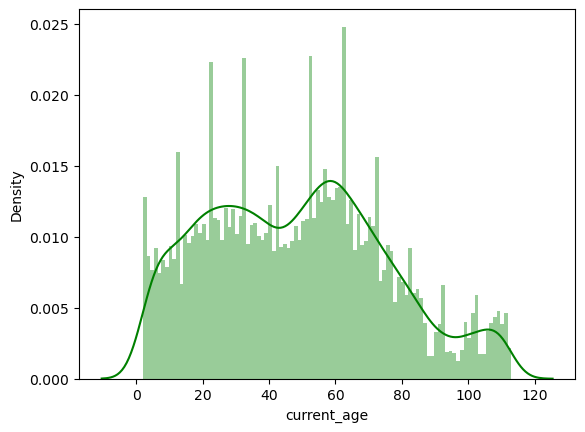

In [12]:
# add in a new variable to store the current age to the person DataFrame
omop_person['current_age'] = omop_person.birth_datetime.apply(person_age)

sns.distplot(omop_person['current_age'], color='g', bins=100, hist_kws={'alpha': 0.4});

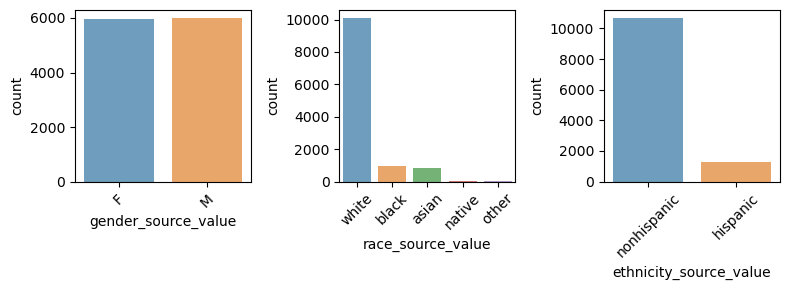

In [13]:
# select catgorical columns of interest
cat_col = ['gender_source_value', 'race_source_value', 'ethnicity_source_value']
df_cat = omop_person[cat_col]

# create figures and plots
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

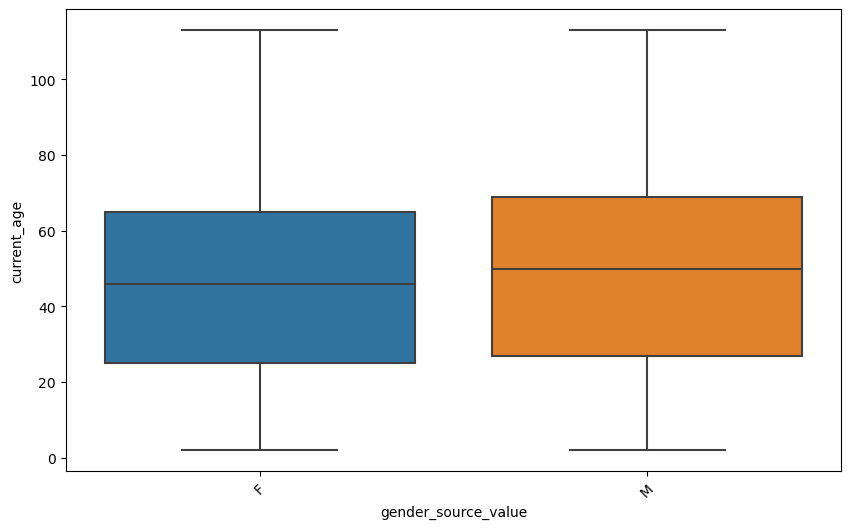

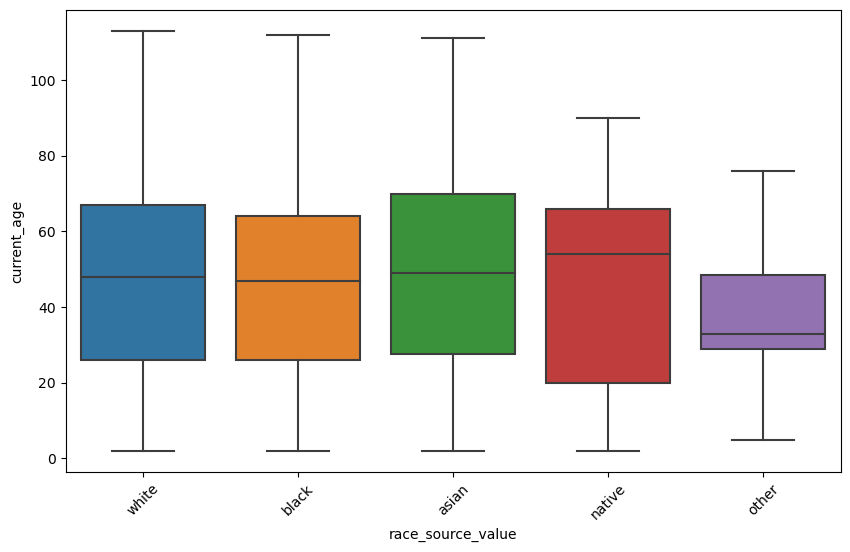

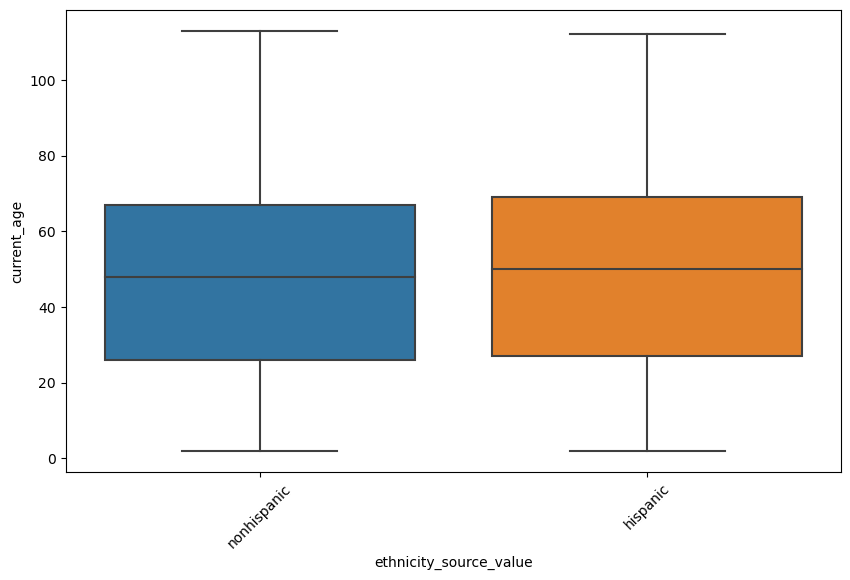

In [14]:
# plot of age across categories (box plots)
for cat in cat_col:
    plt.figure(figsize = (10, 6))
    ax = sns.boxplot(x=cat, y='current_age', data=omop_person)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.xticks(rotation=45)

### The code above are borrowed from the sample code from the github repo.

## Developing our cohort data

In [15]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [16]:
omop_meas = pd.read_sql("select * from omop.measurement", db_connection);
omop_concept = pd.read_sql("select * from omop.concept", db_connection);

In [17]:
# p.DataFrame.merge objects with a database-style join
df = pd.merge(omop_person, omop_visit, on='person_id', how="inner")
df.columns

Index(['person_id', 'gender_concept_id', 'year_of_birth', 'month_of_birth',
       'day_of_birth', 'birth_datetime', 'race_concept_id',
       'ethnicity_concept_id', 'location_id', 'provider_id_x',
       'care_site_id_x', 'person_source_value', 'gender_source_value',
       'gender_source_concept_id', 'race_source_value',
       'race_source_concept_id', 'ethnicity_source_value',
       'ethnicity_source_concept_id', 'current_age', 'visit_occurrence_id',
       'visit_concept_id', 'visit_start_date', 'visit_start_datetime',
       'visit_end_date', 'visit_end_datetime', 'visit_type_concept_id',
       'provider_id_y', 'care_site_id_y', 'visit_source_value',
       'visit_source_concept_id', 'admitted_from_concept_id',
       'admitted_from_source_value', 'discharged_to_concept_id',
       'discharged_to_source_value', 'preceding_visit_occurrence_id'],
      dtype='object')

In [18]:
# merged two tables to a new DataFrame df_means on measurement_concept_id 
#df_meas = pd.merge(omop_meas, omop_concept[['concept_id', 'concept_name']], left_on='measurement_concept_id', right_on='concept_id')
#df_meas.columns

In [19]:
#merge with measurement table and teh concept table
df = pd.merge(df, omop_meas, on="visit_occurrence_id", how="left", suffixes=("_df", "_meas"))

df = pd.merge(df, omop_concept[['concept_id', 'concept_name']], 
              left_on="measurement_concept_id", 
              right_on="concept_id", 
              how="left")

df1=df.copy()

In [20]:
df.columns

Index(['person_id_df', 'gender_concept_id', 'year_of_birth', 'month_of_birth',
       'day_of_birth', 'birth_datetime', 'race_concept_id',
       'ethnicity_concept_id', 'location_id', 'provider_id_x',
       'care_site_id_x', 'person_source_value', 'gender_source_value',
       'gender_source_concept_id', 'race_source_value',
       'race_source_concept_id', 'ethnicity_source_value',
       'ethnicity_source_concept_id', 'current_age', 'visit_occurrence_id',
       'visit_concept_id', 'visit_start_date', 'visit_start_datetime',
       'visit_end_date', 'visit_end_datetime', 'visit_type_concept_id',
       'provider_id_y', 'care_site_id_y', 'visit_source_value',
       'visit_source_concept_id', 'admitted_from_concept_id',
       'admitted_from_source_value', 'discharged_to_concept_id',
       'discharged_to_source_value', 'preceding_visit_occurrence_id',
       'measurement_id', 'person_id_meas', 'measurement_concept_id',
       'measurement_date', 'measurement_datetime', 'measurement

In [21]:
df=df1##for faster debug purpose

In [22]:
#Then we creata new columns to store the current age,age_at_visit and visit_length 
# define a function to find a person's current age
def person_age(birthdate):
    """
    defines age based on current date
    """
    difference_in_years = relativedelta(datetime.now(), birthdate).years
    return difference_in_years
df['current_age'] = df.birth_datetime.apply(person_age)
# We before used the function to calculate the current age, so we can use the similar logic to calculate the age at visit
## Calculate age at visit
df['age_at_visit'] = df['visit_start_datetime'].dt.year - df['year_of_birth']

## Calculate visit length (days between visit start and end)
df['visit_length'] = (df['visit_end_datetime'] - df['visit_start_datetime']).dt.days

### By searching the code on the OHDSI website, we can find the concept_id for the hyperextention and diabetes.
### the hyperextention concept_id is 4233079, and there are lots of concept_id for diabetes, we choose the type 1, type 2 and diabetes mellitus concept_id[201254, 201826, 40389543]

In [23]:
hypertension_codes=[4233079]
diabetes_codes=[201254, 201826, 40389543]
df['hypertension'] = df['measurement_concept_id'].isin(hypertension_codes).astype(int)
df['diabetes'] = df['measurement_concept_id'].isin(diabetes_codes).astype(int)

In [24]:
df['diabetes'].value_counts()

0    4204920
Name: diabetes, dtype: int64

In [25]:
df[['current_age']].dropna().describe()
df['current_age'].unique()

array([ 97,  45,  94, 103,  88,  57,  62,   6,  79,  81,  68,  56,  61,
        40,  69,  78,  96,   7,  17,  10,  59,  70,  28,   9,  48,  72,
        15,  38,  23,  63,  18,  44,  14,  58,  53,  35,  54,  52,  76,
        71,  75,  22,  98,   2,  67,  26,  16,  46,  60,  43, 109,  42,
        77,  34, 110,   4,  24,  50,  95, 101,  65, 111, 100, 102,  13,
        20,  41,   5, 106,  25,   3,  86,  32,  55,  66,  33,  85,  73,
        29,  64,  19,  27,  87,  51,   8,  89,  49,  31,  21,  12,  93,
        47,  39,  74,  36,  84, 105,  92,  80,  83,  91, 112,  99,  82,
        11, 104,  37,  30, 108,  90, 107, 113])

In [26]:
#the number of visits per patient
df['visit_count'] = df.groupby('person_id_df')['visit_occurrence_id'].transform('nunique')

In [27]:
#Inclusion criteria
df = df[(df['current_age'] >= 52) & (df['current_age'] <= 56)]
visit_counts = df.groupby('person_id_df')['visit_occurrence_id'].nunique()
df = df[df['person_id_df'].isin(visit_counts[visit_counts.between(1, 37)].index)]



In [28]:
df2=df.copy() #cache for faster debug purpose

In [29]:
#Exclusion criteria
# Identify patients with high systolic blood pressure within visits 3-17

df = df[~df['visit_count'].between(3, 17) | (df['concept_name'] != 'High Systolic BP')]
df = df.dropna(subset=['measurement_concept_id'])  # Remove visits without measurements

### Deal with the missing values.

In [30]:
df['measurement_event_id']=df['measurement_event_id'].fillna('NA')
df['meas_event_field_concept_id']=df['meas_event_field_concept_id'].fillna('NA')

In [31]:
df3=df.copy() #cache for faster debug purpose

### label measurement columns with the name of the biomarker being measured

In [32]:
# Step 1: Create mapping for measurement_concept_id → concept_name
concept_mapping = df[['measurement_concept_id', 'concept_name']].drop_duplicates()
concept_dict = dict(zip(concept_mapping['measurement_concept_id'], concept_mapping['concept_name']))

# Step 2: Pivot measurements to make biomarker names column headers
df_measurements = df.pivot_table(
    index=['person_id_df', 'visit_occurrence_id'],
    columns='concept_name',
    values='value_as_number',
    aggfunc='first'
).reset_index()

# Step 3: Drop raw measurement columns before merging
df = df.drop(columns=['measurement_concept_id', 'value_as_number', 'concept_name'], errors='ignore')

# Step 4: Merge pivoted measurement data back
df = df.merge(df_measurements, on=['person_id_df', 'visit_occurrence_id'], how='left')

# Step 5: Missingvales. Fill missing values with 'NA'
df.fillna('NA', inplace=True)

In [33]:
df.head()

,person_id_df,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id_x,...,Systolic blood pressure,Thyrotropin [Units/volume] in Serum or Plasma,Thyroxine (T4) free [Mass/volume] in Serum or Plasma,Triglyceride [Mass/volume] in Serum or Plasma,Troponin I.cardiac [Mass/volume] in Serum or Plasma by High sensitivity method,Urea nitrogen [Mass/volume] in Blood,Urea nitrogen [Mass/volume] in Serum or Plasma,Weight-for-length Per age and sex,pH of Arterial blood,pH of Urine by Test strip
0,18,8507,1968,11,18,1968-11-18,8527,38003564,NA,NA,...,130.0,NA,NA,NA,NA,17.9,NA,NA,NA,NA
1,18,8507,1968,11,18,1968-11-18,8527,38003564,NA,NA,...,130.0,NA,NA,NA,NA,17.9,NA,NA,NA,NA
2,18,8507,1968,11,18,1968-11-18,8527,38003564,NA,NA,...,130.0,NA,NA,NA,NA,17.9,NA,NA,NA,NA
3,18,8507,1968,11,18,1968-11-18,8527,38003564,NA,NA,...,130.0,NA,NA,NA,NA,17.9,NA,NA,NA,NA
4,18,8507,1968,11,18,1968-11-18,8527,38003564,NA,NA,...,130.0,NA,NA,NA,NA,17.9,NA,NA,NA,NA


### Visualization

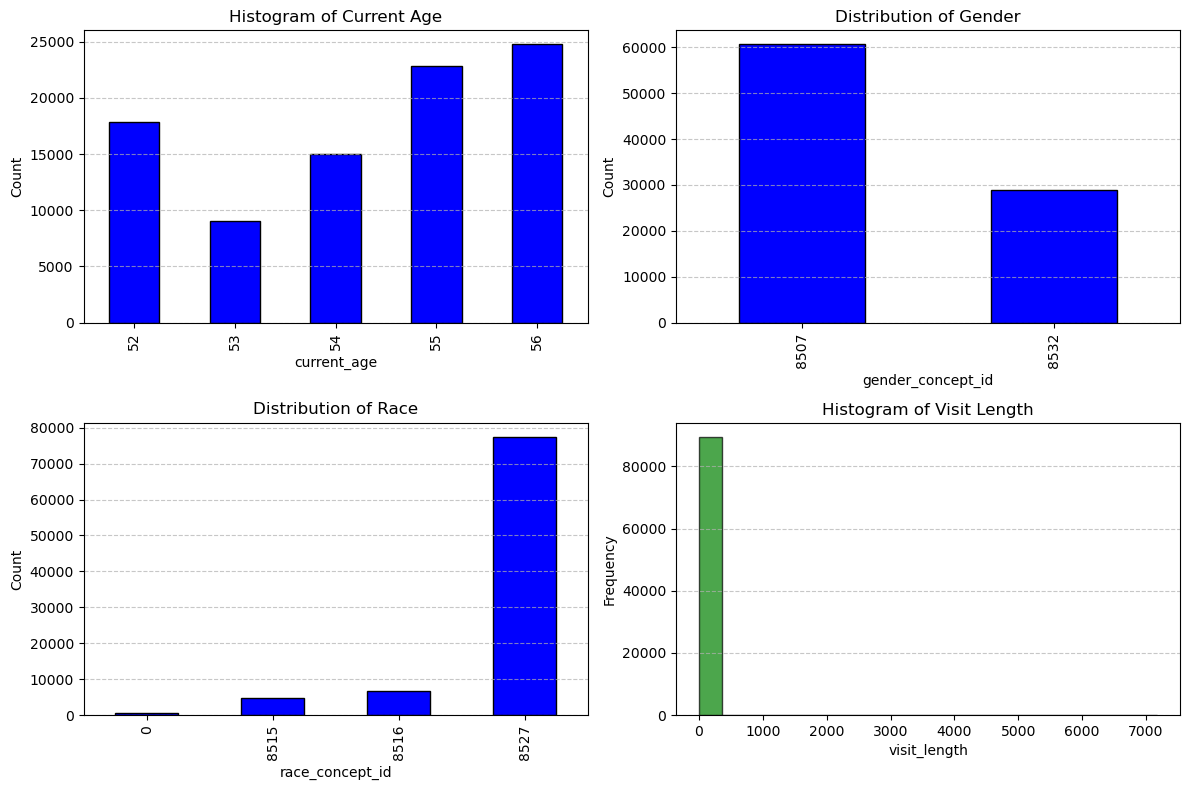

In [34]:
import matplotlib.pyplot as plt

# Ensure df is loaded.
if 'df' in globals():
    # Define the columns to plot and titles
    plot_columns = ['current_age', 'gender_concept_id', 'race_concept_id', 'visit_length']
    titles = ['Histogram of Current Age', 'Distribution of Gender', 'Distribution of Race', 'Histogram of Visit Length']

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))


    axes = axes.flatten()

    for i, col in enumerate(plot_columns):
        ax = axes[i]
        if df[col].dtype == 'object' or df[col].nunique() < 10:  # Bar plot for categorical data
            df[col].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', ax=ax)
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
        else:  #numerical data
            df[col].dropna().astype(float).plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, color='green', ax=ax)
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')

        ax.set_title(titles[i])
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Dataset `df` is not loaded. Please load the dataset and try again.")


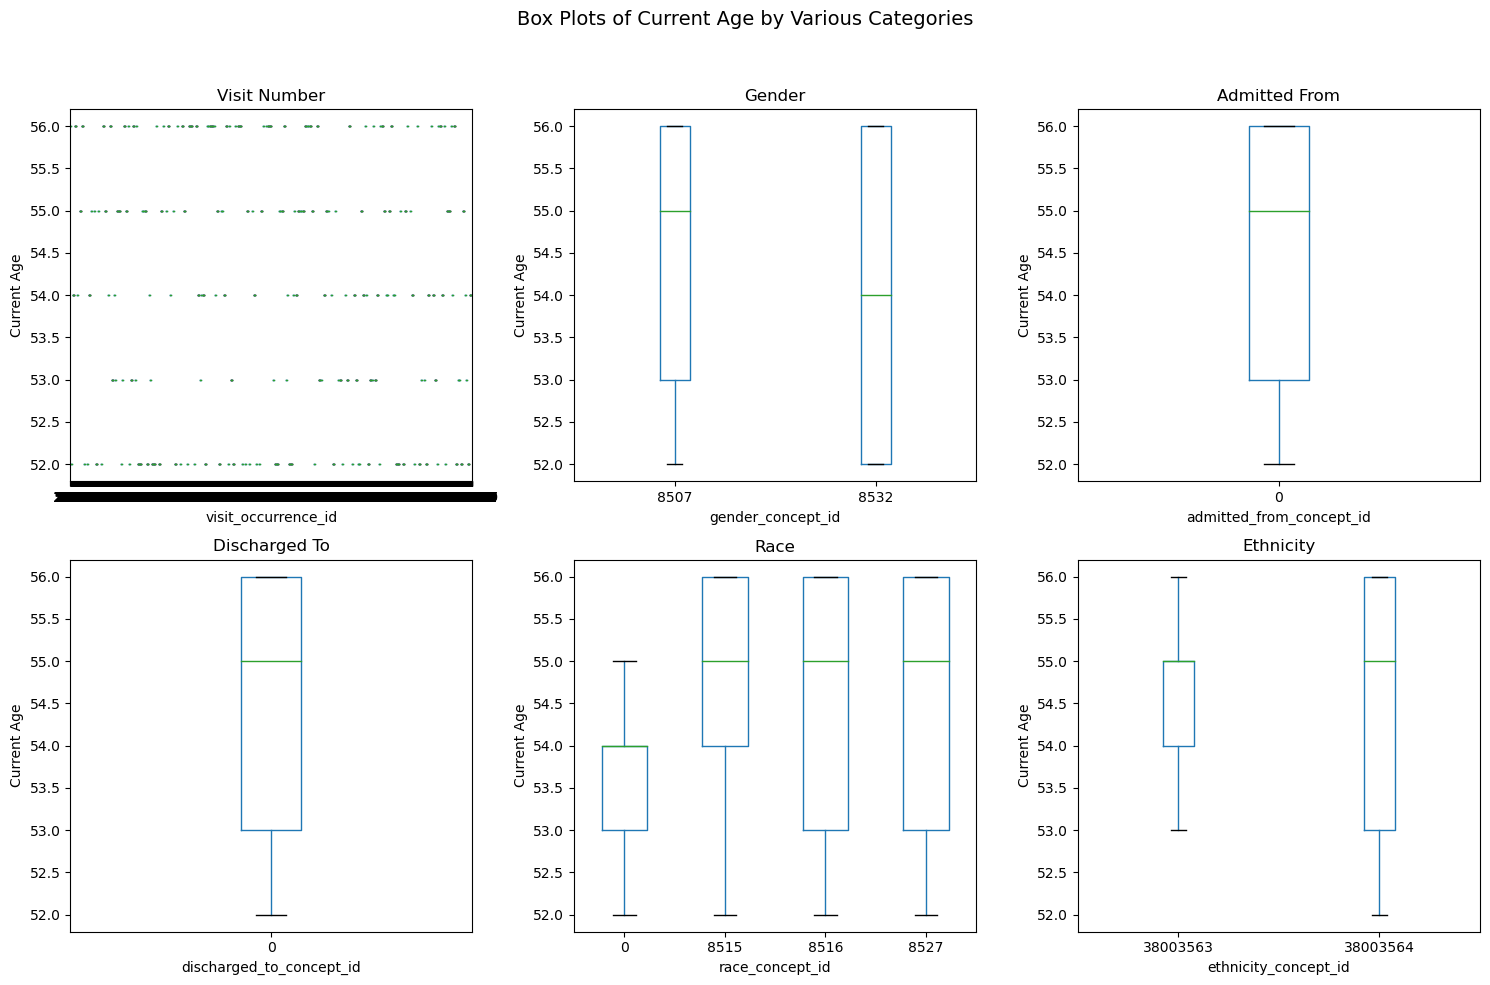

In [35]:
import matplotlib.pyplot as plt
if 'df' in globals():
    # Define the columns for box plots and titles
    boxplot_columns = ['visit_occurrence_id', 'gender_concept_id', 'admitted_from_concept_id', 
                       'discharged_to_concept_id', 'race_concept_id', 'ethnicity_concept_id']
    titles = ['Visit Number', 'Gender', 'Admitted From', 'Discharged To', 'Race', 'Ethnicity']

    # 2x3 subplot layout
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(boxplot_columns):
        ax = axes[i]
        df.boxplot(column='current_age', by=col, ax=ax, grid=False, showfliers=False)
        ax.set_xlabel(col)
        ax.set_ylabel('Current Age')
        ax.set_title(titles[i])
    plt.suptitle("Box Plots of Current Age by Various Categories", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

else:
    print("Dataset `df` is not loaded. Please load the dataset and try again.")


In [36]:
df.to_csv('hw1_data.csv', index=False)